# A Network Analysis of Star Wars Movies (1)

This is the first in a series of notebooks to analyze Star Wars movies using Network Science. In this notebook we will analyze the importance of the characters in the first movie (using chronological order and not by release).

About the Network:
- Two characters are connected if they speak in the same scence.
- Labels of the nodes:
    - name: Name of the character;
    - value: Number of scenes the character appeared in;
    - colour: Colour in the visualization.
- Links:
    - value: Number of scenes where the two characters of the link appeared together.

# Importing necessary libraries

In [2]:
#Lib to visualize the network
!pip install nxviz

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json

import networkx as nx
import nxviz as nv
from nxviz import annotate
from nxviz import nodes
from nxviz import edges
from nxviz.plots import aspect_equal, despine

import matplotlib.pyplot as plt

C:\Users\Principal\anaconda3\lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


# Star Wars: Episode I – The Phantom Menace
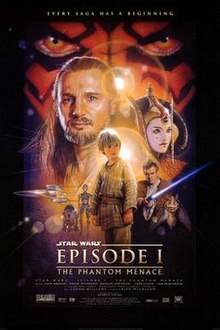

# Network building

We will use networkx and create a graph object for the first movie

Let's create the graph and populate it with the edges from episode 1.

In [4]:
with open('kaggle/input/star-wars/starwars-episode-1-interactions.json') as f:
    data = json.load(f)
print(data['nodes'][0])
print(data['links'][0])

{'name': 'QUI-GON', 'value': 60, 'colour': '#4f4fb1'}
{'source': 1, 'target': 0, 'value': 1}


In [5]:
G = nx.Graph()

#build graph nodes
for node in data['nodes']:
    G.add_node(node['name'])
    G.nodes[node['name']]['colour'] = node['colour']
    G.nodes[node['name']]['scenes'] = node['value']
    G.nodes[node['name']]['name'] = node['name']
     
    
#build graph edges
for edge in data['links']:
    G.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'], weight=edge['value'])

Let's see the number of nodes (number of characters) and links (indicate characters that interact in the same scene) in the network.

In [6]:
print('Number of nodes: ', G.number_of_nodes())
print('Number of links:', G.number_of_edges())

Number of nodes:  37
Number of links: 129


The details of nodes and links

In [7]:
G.nodes(data=True)

NodeDataView({'QUI-GON': {'colour': '#4f4fb1', 'scenes': 60, 'name': 'QUI-GON'}, 'NUTE GUNRAY': {'colour': '#808080', 'scenes': 18, 'name': 'NUTE GUNRAY'}, 'PK-4': {'colour': '#808080', 'scenes': 2, 'name': 'PK-4'}, 'TC-14': {'colour': '#808080', 'scenes': 4, 'name': 'TC-14'}, 'OBI-WAN': {'colour': '#48D1CC', 'scenes': 33, 'name': 'OBI-WAN'}, 'DOFINE': {'colour': '#808080', 'scenes': 3, 'name': 'DOFINE'}, 'RUNE': {'colour': '#808080', 'scenes': 10, 'name': 'RUNE'}, 'TEY HOW': {'colour': '#808080', 'scenes': 4, 'name': 'TEY HOW'}, 'EMPEROR': {'colour': '#191970', 'scenes': 13, 'name': 'EMPEROR'}, 'CAPTAIN PANAKA': {'colour': '#808080', 'scenes': 19, 'name': 'CAPTAIN PANAKA'}, 'SIO BIBBLE': {'colour': '#808080', 'scenes': 7, 'name': 'SIO BIBBLE'}, 'JAR JAR': {'colour': '#9a9a00', 'scenes': 35, 'name': 'JAR JAR'}, 'TARPALS': {'colour': '#808080', 'scenes': 3, 'name': 'TARPALS'}, 'BOSS NASS': {'colour': '#808080', 'scenes': 4, 'name': 'BOSS NASS'}, 'PADME': {'colour': '#DDA0DD', 'scenes': 

In [9]:
G.edges(data=True)

EdgeDataView([('QUI-GON', 'NUTE GUNRAY', {'weight': 1}), ('QUI-GON', 'TC-14', {'weight': 1}), ('QUI-GON', 'OBI-WAN', {'weight': 26}), ('QUI-GON', 'JAR JAR', {'weight': 22}), ('QUI-GON', 'BOSS NASS', {'weight': 2}), ('QUI-GON', 'SIO BIBBLE', {'weight': 2}), ('QUI-GON', 'CAPTAIN PANAKA', {'weight': 9}), ('QUI-GON', 'PADME', {'weight': 16}), ('QUI-GON', 'RIC OLIE', {'weight': 2}), ('QUI-GON', 'WATTO', {'weight': 6}), ('QUI-GON', 'ANAKIN', {'weight': 22}), ('QUI-GON', 'SEBULBA', {'weight': 2}), ('QUI-GON', 'JIRA', {'weight': 2}), ('QUI-GON', 'SHMI', {'weight': 8}), ('QUI-GON', 'KITSTER', {'weight': 2}), ('QUI-GON', 'WALD', {'weight': 2}), ('QUI-GON', 'C-3PO', {'weight': 1}), ('QUI-GON', 'JABBA', {'weight': 1}), ('QUI-GON', 'GREEDO', {'weight': 1}), ('QUI-GON', 'EMPEROR', {'weight': 1}), ('QUI-GON', 'VALORUM', {'weight': 1}), ('QUI-GON', 'MACE WINDU', {'weight': 2}), ('QUI-GON', 'KI-ADI-MUNDI', {'weight': 2}), ('QUI-GON', 'YODA', {'weight': 2}), ('QUI-GON', 'RABE', {'weight': 1}), ('NUTE GU

# Data Visualization

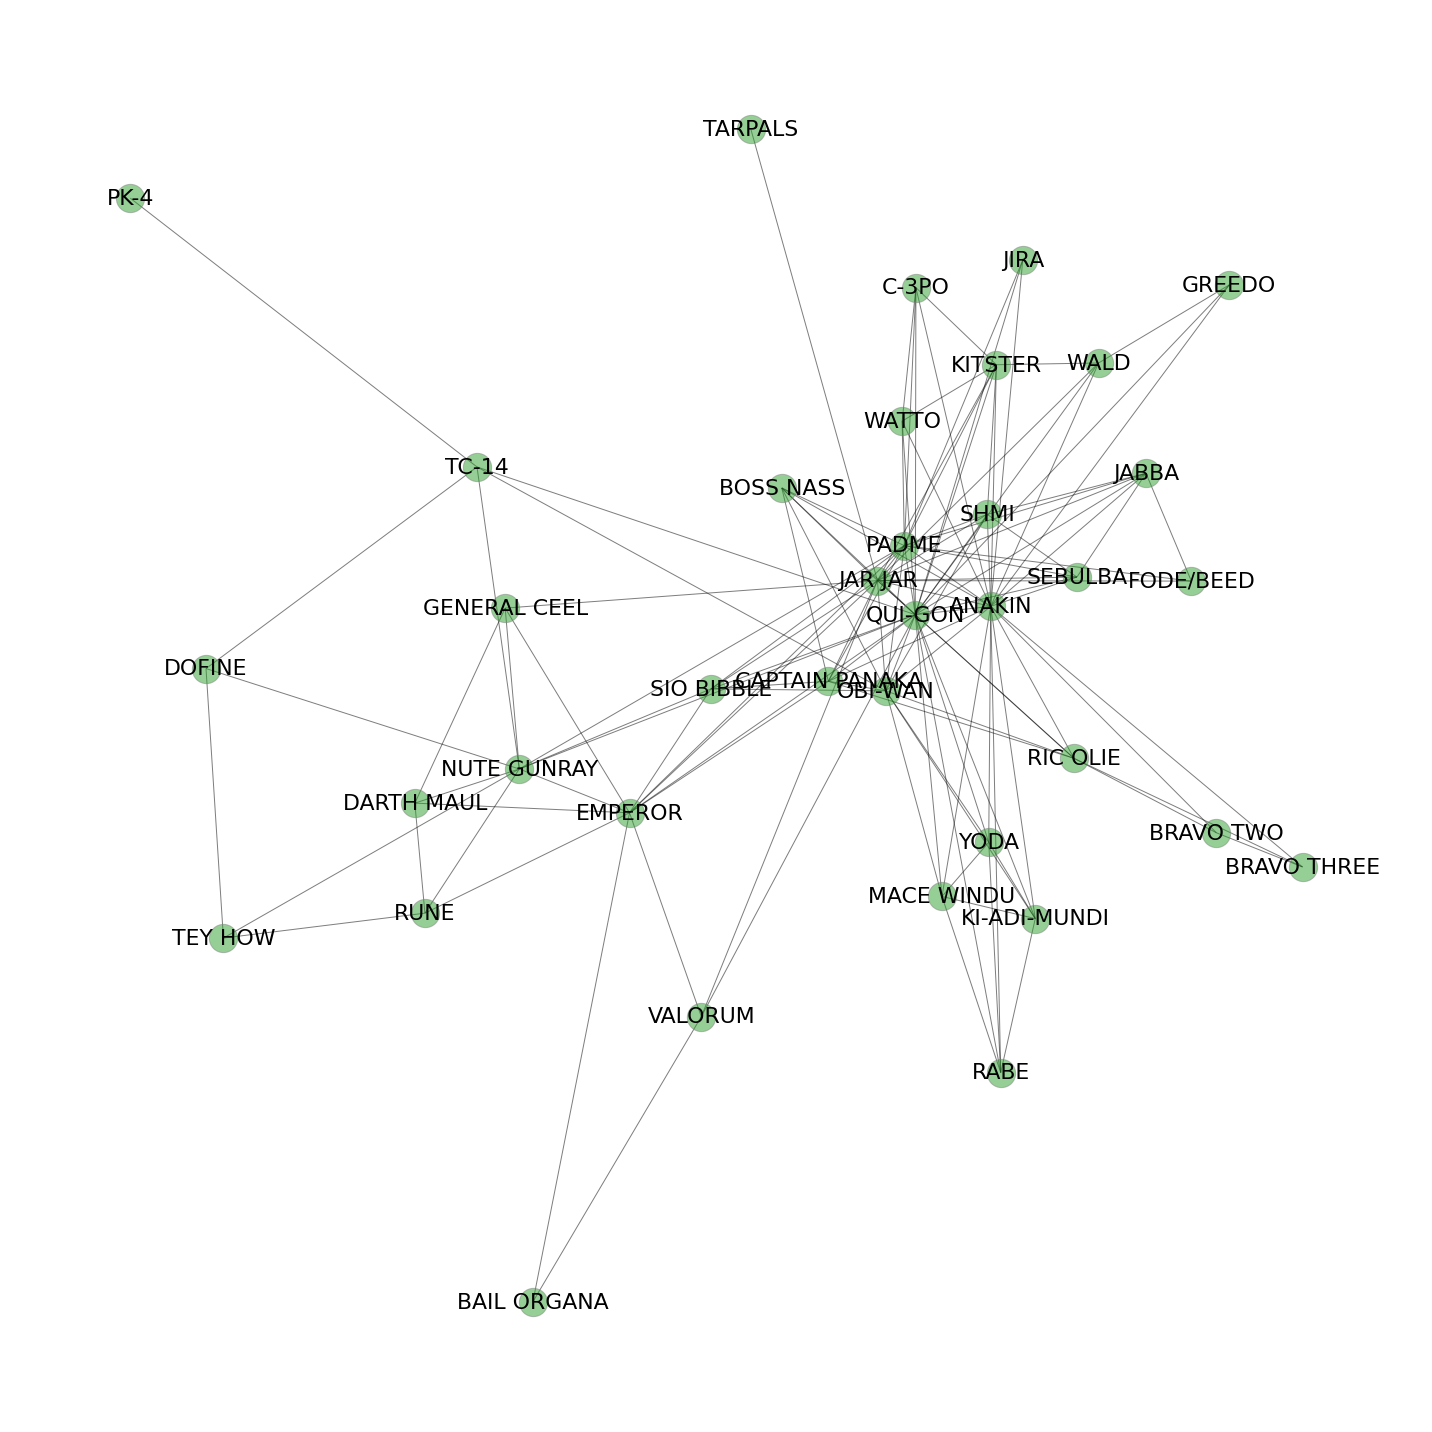

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.5}
nx.draw_networkx_nodes(G, pos, node_color="tab:green", **options)


# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

#labels
nx.draw_networkx_labels(G,pos, font_size=22)

plt.tight_layout()
plt.axis("off")
plt.show()

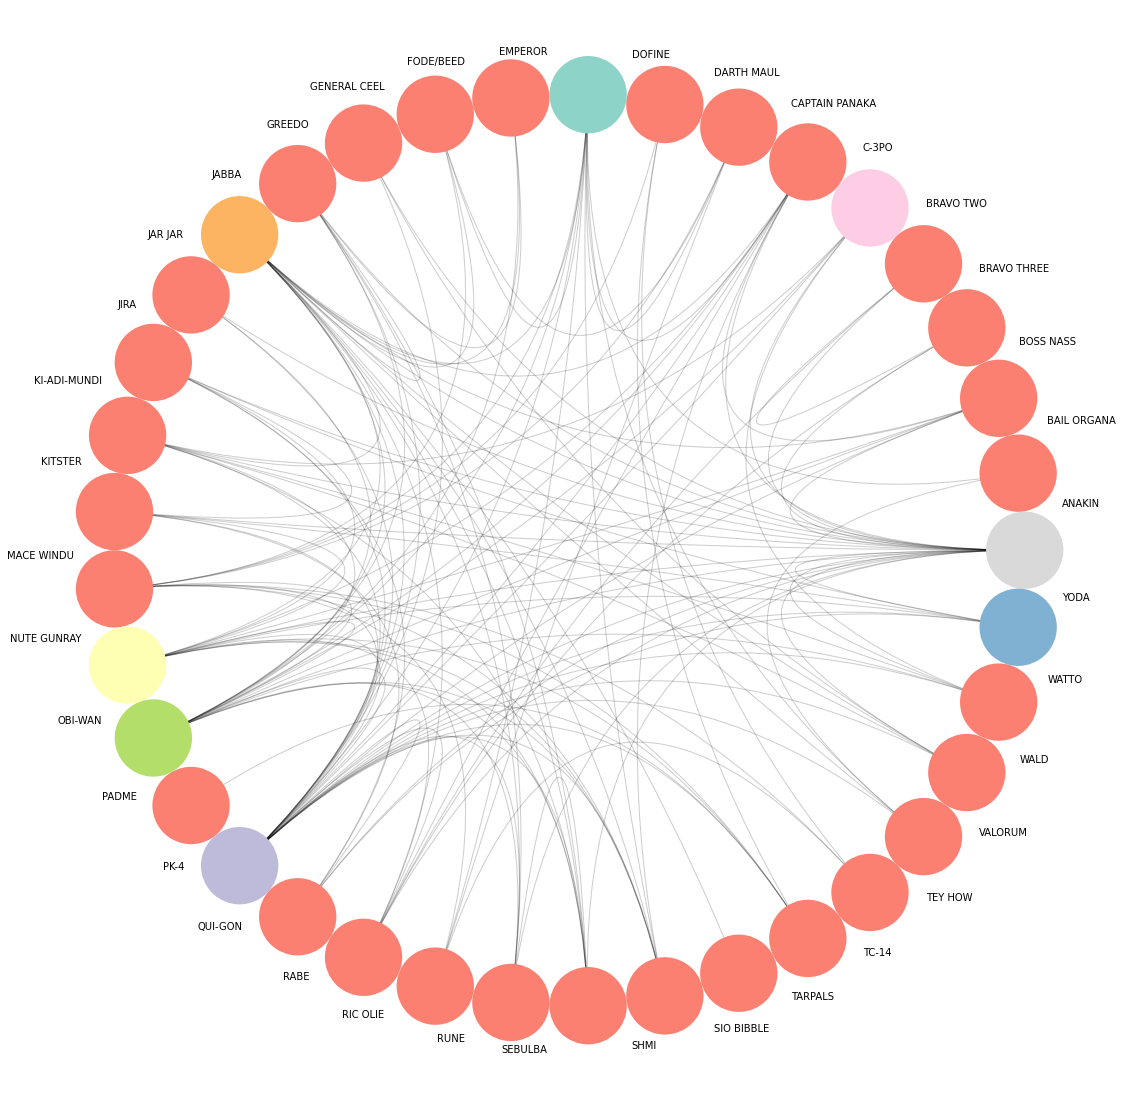

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))
pos = nodes.circos(G, group_by="name", color_by="colour")
edges.circos(G, pos)
annotate.circos_group(G, group_by="name")
despine()
aspect_equal()

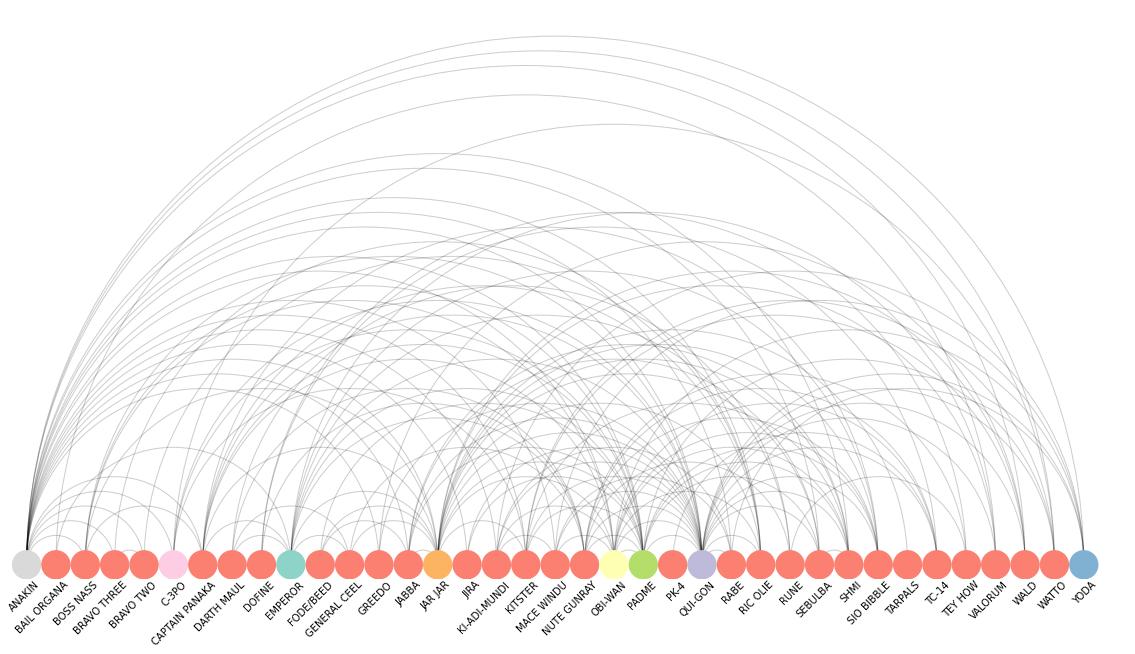

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))
pos = nodes.arc(G, group_by="name", color_by="colour")
edges.arc(G, pos)
annotate.arc_group(G, group_by="name")
despine()
aspect_equal()

The nodes with different colors are highlighted because they are the main characters in the film. Analyzing the views, it is possible to notice that the following characters have more links, that is, they interact with a greater number of other characters during the film: Anakin, Boss Nass, C-3PO, Captain Panaka, Emperor, Jar Jar, Nute Guntay, Obi-Wan, Padme, Qui-Gon,Ric Olie, Shmi, Sio Bibble, TC-14 and Yoda.

Some of these characters are not part of the main characters. Let's perform a grade analysis to better understand the importance of each character in the story.


# Degree Analysis

### Let's visualize the distribution of the degree of nodes with two common techniques: a degree-rank plot and a degree histogram.

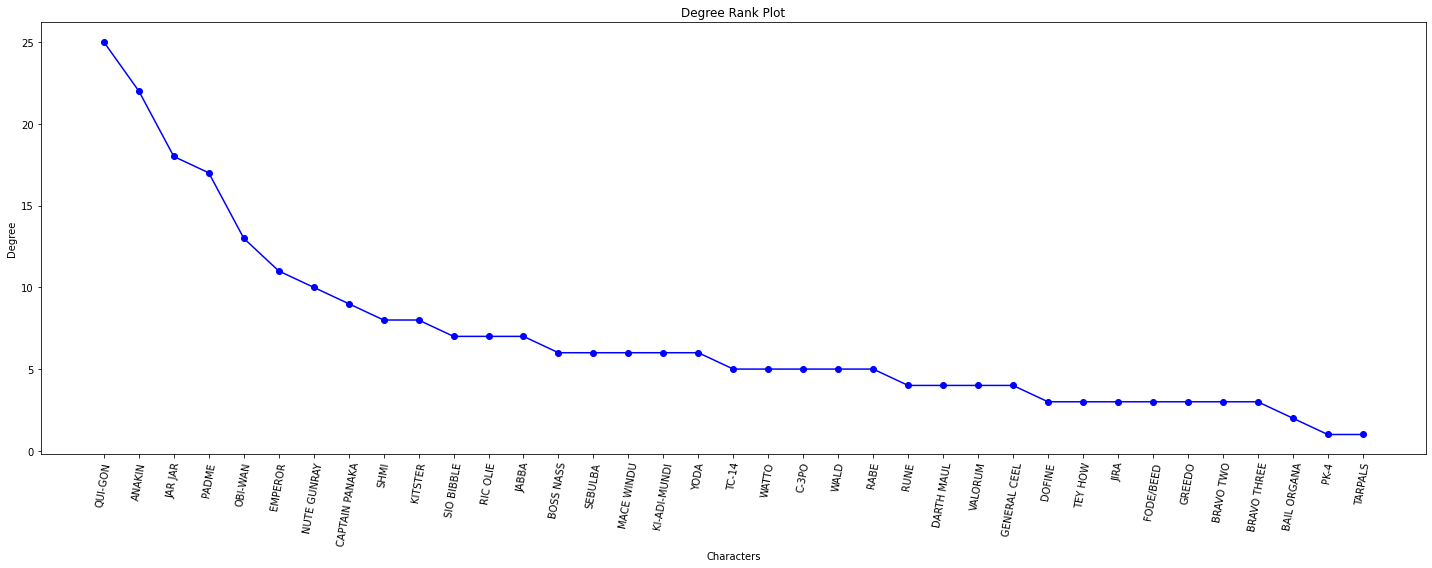

In [13]:
degrees = {}
for node in G.nodes():
    degrees[node] = G.degree[node]

degree_sequence = sorted(list(degrees.values()), reverse=True)
dmax = max(degree_sequence)

degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
people = [degrees[x][0] for x in np.arange(0, len(degrees))]
y_pos = np.arange(len(people))

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(degree_sequence, "b-", marker="o")
ax.set_title("Degree Rank Plot")
ax.set_ylabel("Degree")
ax.set_xlabel("Characters")
ax.set_xticks(y_pos, labels=people, rotation=80)

fig.tight_layout()
plt.show()

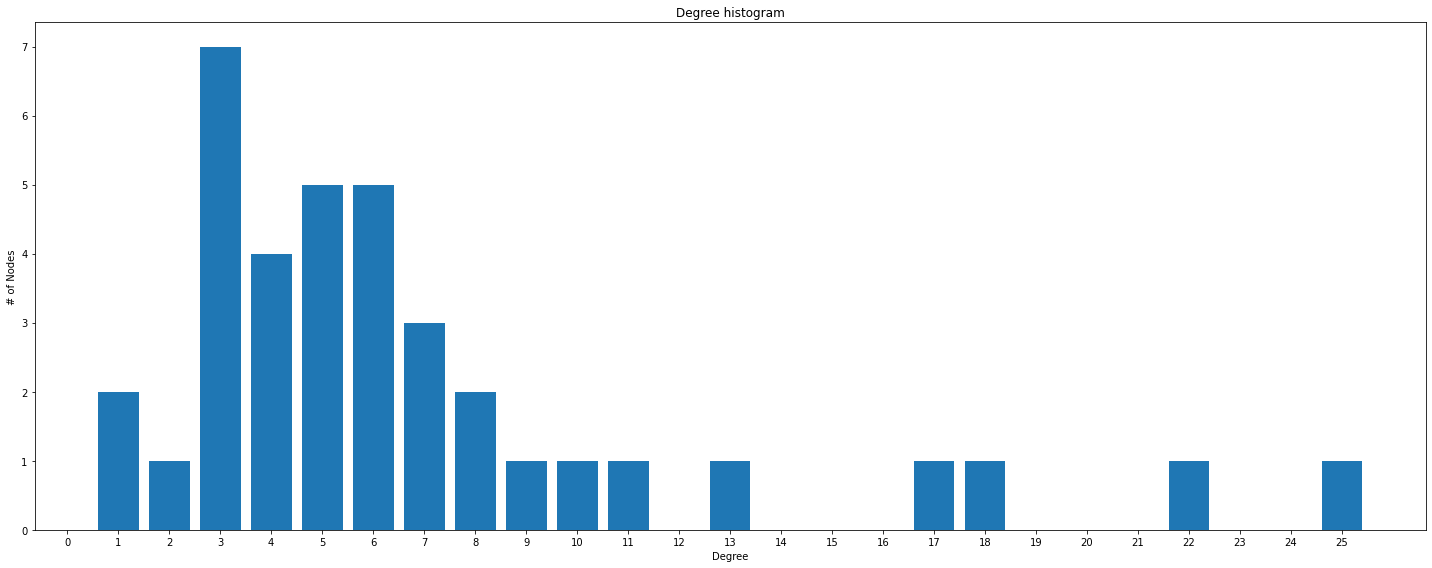

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Degree histogram")
ax.set_xlabel("Degree")
ax.set_ylabel("# of Nodes")
ax.set_xticks(np.arange(dmax + 1))

fig.tight_layout()
plt.show()

# The 10 nodes with the highest degree

In [15]:
degrees[:10]

[('QUI-GON', 25),
 ('ANAKIN', 22),
 ('JAR JAR', 18),
 ('PADME', 17),
 ('OBI-WAN', 13),
 ('EMPEROR', 11),
 ('NUTE GUNRAY', 10),
 ('CAPTAIN PANAKA', 9),
 ('SHMI', 8),
 ('KITSTER', 8)]

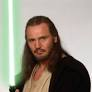 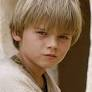 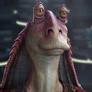 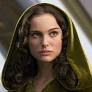 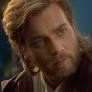 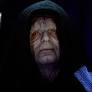 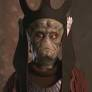 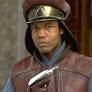 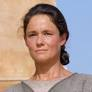 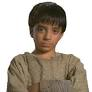

We can see that the degree of the node does not necessarily represent the importance of a character in the movie, for example, Kitster (Anakin's best friend) is among the 10 nodes with the highest degree, as he interacts with eight other characters in the scene, but this does not means that he is more important in the movie than Darth Maul (the villain/Sith)

## Mean Degree

Let's calculate the average degree of the network and then check who are the nodes with degree greater than the average degree.

In [16]:
mean_degree = np.mean(list(dict(G.degree()).values()))
print('Mean degree: ', mean_degree)

Mean degree:  6.972972972972973


In [17]:
[degrees[x] for x in np.arange(0, len(degrees)) if degrees[x][1] >= mean_degree]

[('QUI-GON', 25),
 ('ANAKIN', 22),
 ('JAR JAR', 18),
 ('PADME', 17),
 ('OBI-WAN', 13),
 ('EMPEROR', 11),
 ('NUTE GUNRAY', 10),
 ('CAPTAIN PANAKA', 9),
 ('SHMI', 8),
 ('KITSTER', 8),
 ('SIO BIBBLE', 7),
 ('RIC OLIE', 7),
 ('JABBA', 7)]

# Eccentricity Analysis

The eccentricity of a node v is the maximum distance from v to all other nodes in G. This means that the smaller the eccentricity of a node, the closer it is to the others.

Let's observe the eccentricity of the network nodes in ascending order.

In [18]:
sorted(dict(nx.eccentricity(G)).items(), key=lambda x: x[1], reverse=False)

[('QUI-GON', 2),
 ('NUTE GUNRAY', 3),
 ('TC-14', 3),
 ('OBI-WAN', 3),
 ('EMPEROR', 3),
 ('CAPTAIN PANAKA', 3),
 ('SIO BIBBLE', 3),
 ('JAR JAR', 3),
 ('BOSS NASS', 3),
 ('PADME', 3),
 ('RIC OLIE', 3),
 ('WATTO', 3),
 ('ANAKIN', 3),
 ('SEBULBA', 3),
 ('JIRA', 3),
 ('SHMI', 3),
 ('C-3PO', 3),
 ('KITSTER', 3),
 ('WALD', 3),
 ('JABBA', 3),
 ('GREEDO', 3),
 ('VALORUM', 3),
 ('MACE WINDU', 3),
 ('KI-ADI-MUNDI', 3),
 ('YODA', 3),
 ('RABE', 3),
 ('GENERAL CEEL', 3),
 ('PK-4', 4),
 ('DOFINE', 4),
 ('RUNE', 4),
 ('TEY HOW', 4),
 ('TARPALS', 4),
 ('DARTH MAUL', 4),
 ('FODE/BEED', 4),
 ('BAIL ORGANA', 4),
 ('BRAVO TWO', 4),
 ('BRAVO THREE', 4)]

The diameter is the maximum eccentricity:

In [19]:
nx.diameter(G)

4

The radius is the minimum eccentricity:

In [20]:
nx.radius(G)

2

The center is the set of nodes with eccentricity equal to radius. In other words, the central nodes are closest to the other nodes in the network. In our network from Episode 1, Qui-Gon is the central node:

In [21]:
nx.center(G)

['QUI-GON']

It seems that Qui-Gon is the most important character in the film. We will use some measures of centrality to verify this hypothesis.

# The most important character in Star Wars Episode 1

Let's test our hypothesis that John is the most important character in the movie. There are several ways to measure the importance of a node in a network. Here we will use the following metrics:
- degree centrality
- betweenness centrality
- PageRank

## Degree Centrality

The degree centrality for a node v is the fraction of nodes it is connected to.

In [22]:
# Calculating the degree centrality of episode 1
deg_cen_ep1 = nx.degree_centrality(G)

# Sorting the dictionaries
sorted_deg_cen_ep1 = sorted(deg_cen_ep1.items(), key=lambda x: x[1], reverse=True)


# Printing out the top 10 of episode 1
print(sorted_deg_cen_ep1)

[('QUI-GON', 0.6944444444444444), ('ANAKIN', 0.611111111111111), ('JAR JAR', 0.5), ('PADME', 0.4722222222222222), ('OBI-WAN', 0.3611111111111111), ('EMPEROR', 0.3055555555555555), ('NUTE GUNRAY', 0.2777777777777778), ('CAPTAIN PANAKA', 0.25), ('SHMI', 0.2222222222222222), ('KITSTER', 0.2222222222222222), ('SIO BIBBLE', 0.19444444444444442), ('RIC OLIE', 0.19444444444444442), ('JABBA', 0.19444444444444442), ('BOSS NASS', 0.16666666666666666), ('SEBULBA', 0.16666666666666666), ('MACE WINDU', 0.16666666666666666), ('KI-ADI-MUNDI', 0.16666666666666666), ('YODA', 0.16666666666666666), ('TC-14', 0.1388888888888889), ('WATTO', 0.1388888888888889), ('C-3PO', 0.1388888888888889), ('WALD', 0.1388888888888889), ('RABE', 0.1388888888888889), ('RUNE', 0.1111111111111111), ('DARTH MAUL', 0.1111111111111111), ('VALORUM', 0.1111111111111111), ('GENERAL CEEL', 0.1111111111111111), ('DOFINE', 0.08333333333333333), ('TEY HOW', 0.08333333333333333), ('JIRA', 0.08333333333333333), ('FODE/BEED', 0.083333333

In [23]:
sorted_deg_cen_ep1[:10]

[('QUI-GON', 0.6944444444444444),
 ('ANAKIN', 0.611111111111111),
 ('JAR JAR', 0.5),
 ('PADME', 0.4722222222222222),
 ('OBI-WAN', 0.3611111111111111),
 ('EMPEROR', 0.3055555555555555),
 ('NUTE GUNRAY', 0.2777777777777778),
 ('CAPTAIN PANAKA', 0.25),
 ('SHMI', 0.2222222222222222),
 ('KITSTER', 0.2222222222222222)]

## Betweenness Centrality

Betweenness centrality compute the shortest-path betweenness centrality for nodes.

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.

In [24]:
# Calculating the degree centrality of episode 1
betweenness_ep1 = nx.betweenness_centrality(G)

# Sorting the dictionaries
sorted_betweenness_ep1 = sorted(betweenness_ep1.items(), key=lambda x: x[1], reverse=True)

# Printing out the top 10 of episode 1
print(sorted_betweenness_ep1)

[('QUI-GON', 0.31915704665704664), ('ANAKIN', 0.16656216358597312), ('JAR JAR', 0.1517886919077395), ('NUTE GUNRAY', 0.1279692617787856), ('EMPEROR', 0.10292093268283746), ('PADME', 0.09696345541583634), ('TC-14', 0.075251952632905), ('OBI-WAN', 0.046589821113630636), ('RIC OLIE', 0.025363384411003456), ('VALORUM', 0.016158180443894728), ('CAPTAIN PANAKA', 0.009765913099246433), ('GENERAL CEEL', 0.006515495086923658), ('JABBA', 0.005612244897959183), ('KITSTER', 0.0046296296296296285), ('SIO BIBBLE', 0.00452506928697405), ('RUNE', 0.003756613756613756), ('WALD', 0.0021315192743764175), ('DOFINE', 0.0019047619047619048), ('SHMI', 0.0015873015873015873), ('TEY HOW', 0.0007936507936507937), ('DARTH MAUL', 0.000529100529100529), ('MACE WINDU', 0.00031746031746031746), ('KI-ADI-MUNDI', 0.00031746031746031746), ('YODA', 0.00031746031746031746), ('PK-4', 0.0), ('TARPALS', 0.0), ('BOSS NASS', 0.0), ('WATTO', 0.0), ('SEBULBA', 0.0), ('JIRA', 0.0), ('C-3PO', 0.0), ('FODE/BEED', 0.0), ('GREEDO', 

In [25]:
sorted_betweenness_ep1[:10]

[('QUI-GON', 0.31915704665704664),
 ('ANAKIN', 0.16656216358597312),
 ('JAR JAR', 0.1517886919077395),
 ('NUTE GUNRAY', 0.1279692617787856),
 ('EMPEROR', 0.10292093268283746),
 ('PADME', 0.09696345541583634),
 ('TC-14', 0.075251952632905),
 ('OBI-WAN', 0.046589821113630636),
 ('RIC OLIE', 0.025363384411003456),
 ('VALORUM', 0.016158180443894728)]

Previously we calculated the betweenness centrality considering all links equally. However, the links between the nodes have weights (which indicate the number of times that two characters interacted in the same movie scene). Let's calculate the centrality again, but considering the node weights in the calculation.

In [26]:
# Calculating the degree centrality of episode 1
betweenness_weight_ep1 = nx.betweenness_centrality(G, weight='weight')

# Sorting the dictionaries
sorted_betweenness_weight_ep1 = sorted(betweenness_weight_ep1.items(), key=lambda x: x[1], reverse=True)

# Printing out the top 10 of episode 1
print(sorted_betweenness_weight_ep1)

[('QUI-GON', 0.27743128564557135), ('JAR JAR', 0.19074091252662678), ('ANAKIN', 0.14871401085686803), ('JABBA', 0.1359415011795964), ('PADME', 0.12367616069997024), ('NUTE GUNRAY', 0.11886180398085162), ('GENERAL CEEL', 0.10891534391534391), ('RABE', 0.08984413293937103), ('TC-14', 0.08373519778281682), ('KITSTER', 0.06695406445406445), ('OBI-WAN', 0.06682115944020704), ('EMPEROR', 0.0647089947089947), ('DARTH MAUL', 0.03880952380952381), ('BOSS NASS', 0.03365079365079365), ('VALORUM', 0.028143738977072313), ('GREEDO', 0.025105018438351775), ('C-3PO', 0.02268879268879269), ('SIO BIBBLE', 0.0215640532307199), ('SHMI', 0.01809729952587096), ('WALD', 0.011453995739710027), ('RIC OLIE', 0.01011211892164273), ('TEY HOW', 0.008694885361552027), ('KI-ADI-MUNDI', 0.006419753086419754), ('DOFINE', 0.00400352733686067), ('BRAVO THREE', 0.0015873015873015873), ('RUNE', 0.0007936507936507937), ('CAPTAIN PANAKA', 0.0007936507936507937), ('BAIL ORGANA', 0.0007275132275132275), ('PK-4', 0.0), ('TARPA

In [27]:
sorted_betweenness_weight_ep1[:10]

[('QUI-GON', 0.27743128564557135),
 ('JAR JAR', 0.19074091252662678),
 ('ANAKIN', 0.14871401085686803),
 ('JABBA', 0.1359415011795964),
 ('PADME', 0.12367616069997024),
 ('NUTE GUNRAY', 0.11886180398085162),
 ('GENERAL CEEL', 0.10891534391534391),
 ('RABE', 0.08984413293937103),
 ('TC-14', 0.08373519778281682),
 ('KITSTER', 0.06695406445406445)]

## PageRank of the nodes

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

In [28]:
# Calculating the pagerank of episode 1
pr = nx.pagerank(G, alpha=0.9)

# Sorting the dictionaries
sorted_pr_ep1 = sorted(pr.items(), key=lambda x: x[1], reverse=True)

# Printing out the top 10 of episode 1
print(sorted_pr_ep1)

[('QUI-GON', 0.15076793471793126), ('ANAKIN', 0.10654766884244957), ('JAR JAR', 0.08885956677129028), ('PADME', 0.07739517174315604), ('OBI-WAN', 0.07151556342813985), ('CAPTAIN PANAKA', 0.04647759415123575), ('NUTE GUNRAY', 0.04309254140683146), ('EMPEROR', 0.03796491202433159), ('SHMI', 0.03044686070893036), ('RUNE', 0.026564943281943795), ('RIC OLIE', 0.02367397943247863), ('YODA', 0.020443563252469002), ('MACE WINDU', 0.019397719398278612), ('WATTO', 0.018084986019239163), ('KI-ADI-MUNDI', 0.016114145667174413), ('DARTH MAUL', 0.015649207460971697), ('SIO BIBBLE', 0.015472792507416356), ('KITSTER', 0.014447107688138781), ('TC-14', 0.013692995877389208), ('SEBULBA', 0.013109783803617674), ('BOSS NASS', 0.012734250495317442), ('BRAVO TWO', 0.012670944076202556), ('C-3PO', 0.010978446310795325), ('WALD', 0.010734343192792338), ('JABBA', 0.010515110490161857), ('TEY HOW', 0.010477343418149404), ('VALORUM', 0.010418678586969288), ('DOFINE', 0.009141327843632339), ('BRAVO THREE', 0.00893

In [29]:
sorted_pr_ep1[:10]

[('QUI-GON', 0.15076793471793126),
 ('ANAKIN', 0.10654766884244957),
 ('JAR JAR', 0.08885956677129028),
 ('PADME', 0.07739517174315604),
 ('OBI-WAN', 0.07151556342813985),
 ('CAPTAIN PANAKA', 0.04647759415123575),
 ('NUTE GUNRAY', 0.04309254140683146),
 ('EMPEROR', 0.03796491202433159),
 ('SHMI', 0.03044686070893036),
 ('RUNE', 0.026564943281943795)]

# Correlation between different measures

In [30]:
# Creating a list of degree centrality, betweenness centrality and pagerank 
# of all the characters in Episode 1.
measures = [nx.degree_centrality(G),
            nx.betweenness_centrality(G), 
            nx.betweenness_centrality(G, weight='weight'), 
            nx.pagerank(G), 
            ]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures, index=['degree_centrality', 'betweenness_centrality',
                                                  'betweenness_centrality_weight', 'pagerank'])

# Calculating the correlation
cor.T.corr()

,degree_centrality,betweenness_centrality,betweenness_centrality_weight,pagerank
degree_centrality,1.000000,0.881745,0.818953,0.962644
betweenness_centrality,0.881745,1.000000,0.862639,0.917268
betweenness_centrality_weight,0.818953,0.862639,1.000000,0.787657
pagerank,0.962644,0.917268,0.787657,1.000000


# Conclusion

## Who is the most important character in each metric?

In [31]:
# Finding the most important character in the episode 1
for index, value in cor.idxmax(axis=1).iteritems():
    print(index,':',value)

degree_centrality : QUI-GON
betweenness_centrality : QUI-GON
betweenness_centrality_weight : QUI-GON
pagerank : QUI-GON


As we have seen, in all metrics the character Qui-Gon appears as the most important, which confirms our initial hypothesis.

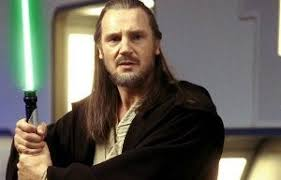

**Next steps:** The character Obi-Wan is one of the most famous of the Star Wars films, but in the 4 metrics we analyzed, he appears only twice in the top 5 character (in fifth place). Will his importance increase in the next films?

In the next notebook we will analyze the evolution of the importance of the characters throughout the films.

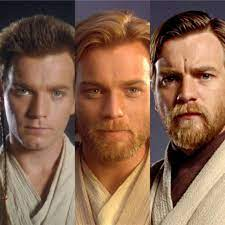